## 3.3 Data Exploration

Based on the data retrieved in the last two sections, we explore the tweets and speeches of the politicians.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from tqdm.notebook import tqdm

pd.options.mode.chained_assignment = None  # default='warn'

tqdm.pandas()

### 3.3.1 Tweets exploration

#### Import data

In [2]:
# Load tweets data
tweets_scraped = pd.read_csv("../data/raw/tweets_scraped.csv", low_memory=False)

#### Check data

In [3]:
tweets_scraped.head()

,datetime,tweet_id,text,username,name,reply_count,retweet_count,like_count,party
0,2022-01-18 11:58:18+00:00,1483408404173500416,Der neuen Präsidentin des @Europarl_DE @Robert...,rbrinkhaus,Ralph Brinkhaus,3.0,3,41.0,CDU
1,2021-12-24 09:06:37+00:00,1474305500472922113,Ich wünsche Ihnen ein frohes und gesegnetes We...,rbrinkhaus,Ralph Brinkhaus,26.0,5,82.0,CDU
2,2021-12-17 13:41:57+00:00,1471838074413924356,Herzlichen Glückwunsch @_FriedrichMerz. Alles ...,rbrinkhaus,Ralph Brinkhaus,132.0,22,607.0,CDU
3,2021-12-15 12:34:54+00:00,1471096426381942791,@dieLinke Die Rede in voller Länge gibt es in ...,rbrinkhaus,Ralph Brinkhaus,7.0,2,13.0,CDU
4,2021-12-15 11:58:36+00:00,1471087291913449472,Eine Demokratie braucht eine starke #Oppositio...,rbrinkhaus,Ralph Brinkhaus,8.0,1,33.0,CDU


In [4]:
tweets_scraped.tail()

,datetime,tweet_id,text,username,name,reply_count,retweet_count,like_count,party
400275,2013-11-10 20:30:25+00:00,399635176701329408,@stefanb_ Die KandidatInnen haben die Unterstü...,ABaerbockArchiv,Annalena Baerbock (Archiv),1.0,0,0.0,Grüne
400276,2013-11-10 11:12:28+00:00,399494763264872448,You decide Europe - Vote now on: greenprimary.eu,ABaerbockArchiv,Annalena Baerbock (Archiv),1.0,0,1.0,Grüne
400277,2013-11-09 14:55:36+00:00,399188527256055809,Engagierte Diskussion zu europ. &amp; globalen...,ABaerbockArchiv,Annalena Baerbock (Archiv),0.0,0,1.0,Grüne
400278,2013-11-08 11:24:22+00:00,398772981528150016,Spannende Klausur der Europagruppe von @Die_Gr...,ABaerbockArchiv,Annalena Baerbock (Archiv),0.0,0,3.0,Grüne
400279,2013-11-07 13:53:38+00:00,398448157262381057,"Hoffe, die Kommission macht gut Druck gegen di...",ABaerbockArchiv,Annalena Baerbock (Archiv),0.0,3,4.0,Grüne


In [5]:
tweets_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400280 entries, 0 to 400279
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   datetime       400280 non-null  object 
 1   tweet_id       400278 non-null  object 
 2   text           400278 non-null  object 
 3   username       341102 non-null  object 
 4   name           341102 non-null  object 
 5   reply_count    341102 non-null  float64
 6   retweet_count  341102 non-null  object 
 7   like_count     341100 non-null  float64
 8   party          341100 non-null  object 
dtypes: float64(2), object(7)
memory usage: 27.5+ MB


In [6]:
tweets_scraped.describe()

,reply_count,like_count
count,341102.000000,341100.000000
mean,17.121946,135.328531
std,84.147600,732.384448
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,5.000000
75%,6.000000,47.000000
max,9635.000000,106464.000000


#### Drop missing data

We can drop all records with missing data, as we cannot use these records for our analysis.

In [7]:
# Drop missing data
tweets_scraped.dropna(inplace = True)

#### Clean names

For better comparability, we harmonize the names in the tweets and speeches data.

In [8]:
# Create twitter username to real name dictionary
usernames_to_fullname = {'rbrinkhaus': 'Ralph Brinkhaus', 'groehe': 'Hermann Gröhe', 
                         'NadineSchoen': 'Nadine Schön', 'n_roettgen': 'Norbert Röttgen',
                         'peteraltmaier': 'Peter Altmaier', 'jensspahn': 'Jens Spahn', 
                         'MatthiasHauer': 'Matthias Hauer', 'c_lindner': 'Christian Lindner',
                         'MarcoBuschmann': 'Marco Buschmann', 'starkwatzinger': 'Bettina Stark-Watzinger',
                         'Lambsdorff': 'Alexander Graf Lambsdorff', 'johannesvogel': 'Johannes Vogel',
                         'KonstantinKuhle': 'Konstantin Kuhle', 'MAStrackZi': 'Marie-Agnes Strack-Zimmermann',
                         'larsklingbeil': 'Lars Klingbeil', 'EskenSaskia': 'Saskia Esken',
                         'hubertus_heil': 'Hubertus Heil', 'HeikoMaas': 'Heiko Maas',
                         'MartinSchulz': 'Martin Schulz', 'KarambaDiaby': 'Karamba Diaby',
                         'Karl_Lauterbach': 'Karl Lauterbach', 'SteffiLemke': 'Steffi Lemke',
                         'cem_oezdemir': 'Cem Özdemir', 'GoeringEckardt': 'Katrin Göring-Eckardt',
                         'KonstantinNotz': 'Konstantin von Notz', '6': 'Konstantin von Notz',
                         'BriHasselmann': 'Britta Haßelmann', 'svenlehmann': 'Sven Lehmann',
                         'ABaerbock': 'Annalena Baerbock', 'ABaerbockArchiv': 'Annalena Baerbock',
                         'SWagenknecht': 'Sahra Wagenknecht', 'b_riexinger': 'Bernd Riexinger',
                         'NiemaMovassat': 'Niema Movassat', 'jankortemdb': 'Jan Korte',
                         'DietmarBartsch': 'Dietmar Bartsch', 'GregorGysi': 'Gregor Gysi',
                         'SevimDagdelen': 'Sevim Dağdelen', 'Alice_Weidel': 'Alice Weidel',
                         'Beatrix_vStorch': 'Beatrix von Storch', 'JoanaCotar': 'Joana Cotar',
                         'StBrandner': 'Stephan Brandner', 'Tino_Chrupalla': 'Tino Chrupalla',
                         'GtzFrmming': 'Götz Frömming', '3': 'Götz Frömming', 'Leif_Erik_Holm': 'Leif-Erik Holm'}

In [9]:
# Add full name
tweets_scraped["full_name"] = tweets_scraped.username.replace(usernames_to_fullname)

#### Check time data

In [10]:
# Add normalized date
tweets_scraped["date"] = pd.to_datetime(tweets_scraped["datetime"], format = "%Y-%m-%d").dt.date

In [11]:
tweets_scraped.date.min()

datetime.date(2008, 8, 23)

In [12]:
tweets_scraped.date.max()

datetime.date(2022, 1, 20)

<AxesSubplot:xlabel='date'>

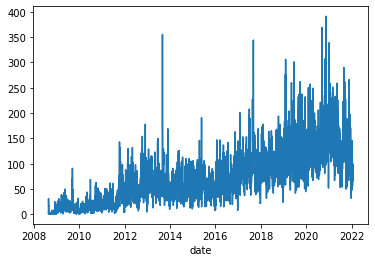

In [13]:
# Tweet number per time
tweets_scraped.groupby('date')['tweet_id'].size().plot()

We now can drop all data that are not also represented in the speeches dataset.

In [14]:
# Drop unneded data
tweets_subset = tweets_scraped[np.logical_and(tweets_scraped.date >= pd.Timestamp("24.10.2017"), tweets_scraped.date <= pd.Timestamp("07.05.2021"))]

/Users/jakob/opt/miniconda3/envs/amca/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


#### Checkt party distribution

When checking the distribution of tweets per party, we can see differences, but they do not significantly alter our results.

In [15]:
# Tweets per party
tweets_subset.groupby("party").size()

party
AFD      32878
CDU      16687
FDP      41668
Grüne    19314
Linke    21582
SPD      32331
dtype: int64

#### Check politician distribution

We see significant differences between the number of tweets per politician ranging from nearly 29665 to 658. We have to consider this in our work.

<AxesSubplot:xlabel='full_name'>

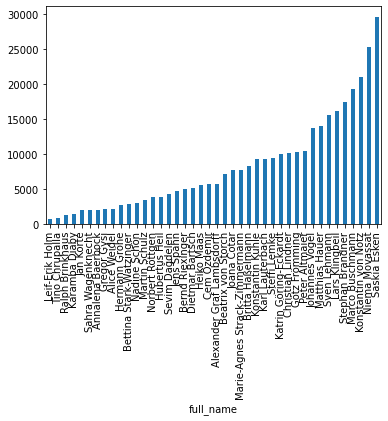

In [16]:
# Tweets per politican
tweets_scraped.groupby('full_name')['tweet_id'].size().sort_values().plot(kind='bar')

We see an strongly increasing trend of tweets per day. This is caused by two new parties entering the bundestag in 2017.

#### Check text

We check the texts of the tweets with a word cloud. We can infer the need for data preprocessing from a first analysis of the visualisation. 

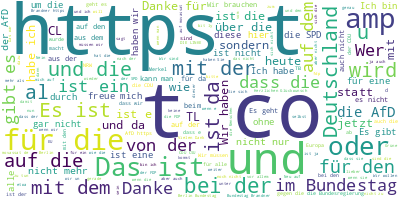

In [17]:
# Create a word cloud
long_string_tweets = ' '.join(tweets_scraped["text"].tolist())
wordcloud_tweets = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud_tweets.generate(long_string_tweets)
wordcloud_tweets.to_image()

In [18]:
# Create a counter object
counter_tweets = Counter(long_string_tweets.split())

In [19]:
# Check the most common words
counter_tweets.most_common(10)

[('die', 123222),
 ('der', 116779),
 ('und', 108207),
 ('in', 78726),
 ('ist', 62979),
 ('für', 56783),
 ('nicht', 53156),
 ('das', 49531),
 ('zu', 49503),
 ('den', 42515)]

We can identify the need for a stopword removal.

#### Drop unneeded columns

In [20]:
# Drop unneeded columns
tweets_subset.drop(['datetime', 'tweet_id', 'username','name', 'reply_count'], axis = 1, inplace = True)

#### Export data

In [21]:
tweets_subset.to_csv("../data/interim/tweets_explored.csv", index = False)

### 3.3.2 Explore speeches of politicians

#### Import data

In [22]:
# Load tweets data
speeches_retrieved = pd.read_csv("../data/raw/speeches_retrieved.csv", low_memory=False)

#### Check data

In [23]:
speeches_retrieved.head()

,id,session,electoral_term,first_name,last_name,politician_id,text,fraction_id,document_url,position_short,position_long,date,search_speech_content
0,1000315,3,19,Niels,Annen,11003732,\n\nVielen Dank. – Herr Präsident! Meine sehr ...,23,https://dip21.bundestag.de/dip21/btp/19/19003.pdf,Member of Parliament,NaN,2017-11-22,'0':87 '1':118 '2':124 '3':167 '4':205 '5':460...
1,1000343,3,19,Filiz,Polat,11004857,\n\nHerr Präsident! Da müssen wir noch ein bis...,3,https://dip21.bundestag.de/dip21/btp/19/19003.pdf,Member of Parliament,NaN,2017-11-22,'0':13 '1':28 '17':121 '2':60 '20':142 '2003':...
2,1000030,1,19,Claudia,Roth,11003212,"\n\nJa, ich nehme die Wahl mit großer Freude a...",3,https://dip21.bundestag.de/dip21/btp/19/19001.pdf,Member of Parliament,NaN,2017-10-24,'0':17 'freu':11 'freud':8 'gross':7 'ja':1 'n...
3,1000000,1,19,Alterspräsident Dr. Hermann,Otto Solms,11002190,"\n\nGuten Morgen, liebe Kolleginnen und Kolleg...",-1,https://dip21.bundestag.de/dip21/btp/19/19001.pdf,Presidium of Parliament,Alterspräsident,2017-10-24,"'0':130 '1':52,152,213,264 '19':28 '19/2':96,2..."
4,1000001,1,19,Alterspräsident Dr. Hermann,Otto Solms,11002190,NaN,-1,https://dip21.bundestag.de/dip21/btp/19/19001.pdf,Presidium of Parliament,Alterspräsident,2017-10-24,NaN


In [24]:
speeches_retrieved.tail()

,id,session,electoral_term,first_name,last_name,politician_id,text,fraction_id,document_url,position_short,position_long,date,search_speech_content
60953,1060953,228,19,Helge,Lindh,11004802,\n\nWie bitte?,23,https://dip21.bundestag.de/dip21/btp/19/19228.pdf,Member of Parliament,NaN,2021-05-07,'bitt':2
60954,1060954,228,19,Petra,Pau,11003206,\n\nSie müssen das jetzt verkürzen und zum Pun...,-1,https://dip21.bundestag.de/dip21/btp/19/19228.pdf,Presidium of Parliament,Vizepräsidentin,2021-05-07,'komm':9 'muss':2 'punkt':8 'verkurz':5
60955,1060955,228,19,Helge,Lindh,11004802,"\n\nGut, ich beschränke mich auf einen Satz:\n...",23,https://dip21.bundestag.de/dip21/btp/19/19228.pdf,Member of Parliament,NaN,2021-05-07,"'0':79 '1':108 'ab':13 'abscheulich':33,63 'be..."
60956,1060956,228,19,Petra,Pau,11003206,\n\nDas Wort hat der Kollege Tankred Schipansk...,-1,https://dip21.bundestag.de/dip21/btp/19/19228.pdf,Presidium of Parliament,Vizepräsidentin,2021-05-07,'0':11 'cdu/csu-fraktion':10 'kolleg':5 'schip...
60957,1060957,228,19,Tankred,Schipanski,11004143,\n\nVielen Dank. – Frau Präsidentin! Liebe Kol...,4,https://dip21.bundestag.de/dip21/btp/19/19228.pdf,Member of Parliament,NaN,2021-05-07,'0':63 '1':117 '1945':124 '1989':148 '2':282 '...


In [25]:
speeches_retrieved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60958 entries, 0 to 60957
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     60958 non-null  int64 
 1   session                60958 non-null  int64 
 2   electoral_term         60958 non-null  int64 
 3   first_name             60955 non-null  object
 4   last_name              60955 non-null  object
 5   politician_id          60958 non-null  int64 
 6   text                   60951 non-null  object
 7   fraction_id            60958 non-null  int64 
 8   document_url           60958 non-null  object
 9   position_short         60958 non-null  object
 10  position_long          31486 non-null  object
 11  date                   60958 non-null  object
 12  search_speech_content  60910 non-null  object
dtypes: int64(5), object(8)
memory usage: 6.0+ MB


In [26]:
speeches_retrieved.describe()

,id,session,electoral_term,politician_id,fraction_id
count,6.095800e+04,60958.000000,60958.0,6.095800e+04,60958.000000
mean,1.030478e+06,119.849109,19.0,1.088126e+07,3.368664
std,1.759720e+04,65.644621,0.0,1.153153e+06,7.122257
min,1.000000e+06,1.000000,19.0,-1.000000e+00,-1.000000
25%,1.015239e+06,62.000000,19.0,1.100312e+07,-1.000000
50%,1.030478e+06,121.000000,19.0,1.100363e+07,-1.000000
75%,1.045718e+06,176.000000,19.0,1.100436e+07,4.000000
max,1.060957e+06,228.000000,19.0,1.100496e+07,23.000000


#### Drop missing data

We can drop all records with missing speech content, as we cannot use these records for our analysis.

In [27]:
# Drop missing data
speeches_retrieved.dropna(subset = ["text"], inplace = True)

#### Clean names

For better comparability, we harmonize the names in the tweets and speeches data.

In [28]:
# Add full name of politicians
speeches_retrieved["full_name"] = speeches_retrieved["first_name"] + " " + speeches_retrieved["last_name"]

In [29]:
# Subset to the selected politicians
speeches_subset = speeches_retrieved[speeches_retrieved.full_name.isin(tweets_subset.full_name.unique())]

#### Check time data

In [30]:
# Add normalized date
speeches_subset["date"] = pd.to_datetime(speeches_subset["date"], format = "%Y-%m-%d").dt.date

In [31]:
speeches_subset.date.min()

datetime.date(2017, 10, 24)

In [32]:
speeches_subset.date.max()

datetime.date(2021, 5, 7)

<AxesSubplot:xlabel='date'>

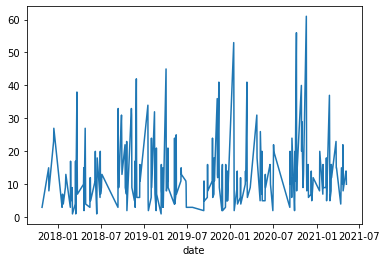

In [33]:
# Speech number per time
speeches_subset.groupby('date')['id'].size().plot()

#### Checkt party distribution

When checking the distribution of speeches per party, we can see differences, but they do not significantly alter our results.

In [34]:
fullname_to_party = {'Ralph Brinkhaus': 'CDU', 'Hermann Gröhe': 'CDU', 'Nadine Schön': 'CDU', 
                     'Norbert Röttgen': 'CDU', 'Peter Altmaier': 'CDU', 'Jens Spahn': 'CDU', 
                     'Matthias Hauer': 'CDU', 'Christian Lindner': 'FDP', 'Marco Buschmann': 'FDP',
                     'Bettina Stark-Watzinger': 'FDP', 'Alexander Graf Lambsdorff': 'FDP', 'Johannes Vogel': 'FDP',
                     'Konstantin Kuhle': 'FDP', 'Marie-Agnes Strack-Zimmermann': 'FDP', 'Lars Klingbeil': 'SPD',
                     'Saskia Esken': 'SPD', 'Hubertus Heil': 'SPD', 'Heiko Maas': 'SPD', 'Martin Schulz': 'SPD', 
                     'Karamba Diaby': 'SPD', 'Karl Lauterbach': 'SPD', 'Steffi Lemke': 'Grüne',
                     'Cem Özdemir': 'Grüne', 'Katrin Göring-Eckardt': 'Grüne', 'Konstantin von Notz': 'Grüne',
                     'Britta Haßelmann': 'Grüne', 'Sven Lehmann': 'Grüne', 'Annalena Baerbock': 'Grüne',
                     'Sahra Wagenknecht': 'Linke', 'Bernd Riexinger': 'Linke', 'Niema Movassat': 'Linke', 
                     'Jan Korte': 'Linke', 'Dietmar Bartsch': 'Linke', 'Gregor Gysi': 'Linke', 
                     'Sevim Dağdelen': 'Linke', 'Alice Weidel': 'AFD', 'Beatrix von Storch': 'AFD', 
                     'Joana Cotar': 'AFD', 'Stephan Brandner': 'AFD', 'Tino Chrupalla': 'AFD',
                     'Götz Frömming': 'AFD', 'Leif-Erik Holm': 'AFD'}

In [35]:
speeches_subset["party"] = speeches_subset.full_name.replace(fullname_to_party)

In [36]:
# Speeches per party
speeches_subset.groupby("party").size()

party
AFD      521
CDU      586
FDP      518
Grüne    469
Linke    303
SPD      588
dtype: int64

#### Check politician distribution

We see significant differences between the number of speeches per politician ranging from 368 to 15. We have to consider this in our work.

<AxesSubplot:xlabel='full_name'>

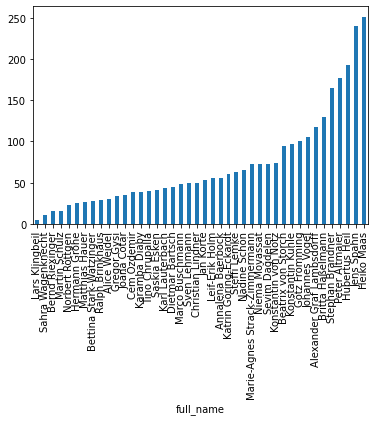

In [37]:
# Speeches per politican
speeches_subset.groupby('full_name')['id'].size().sort_values().plot(kind='bar')

#### Check text

We check the texts of the tweets with a word cloud. We can infer the need for data preprocessing from a first analysis of the visualisation. 

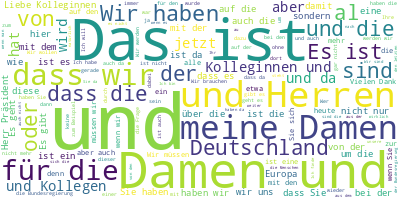

In [38]:
# Create a word cloud
long_string_speeches = ' '.join(speeches_subset["text"].tolist())
wordcloud_speeches = WordCloud(background_color="white", max_words=5000, contour_width=3, 
                               contour_color='steelblue')
wordcloud_speeches.generate(long_string_speeches)
wordcloud_speeches.to_image()

In [39]:
# Create a counter object
speeches_counter = Counter(long_string_speeches.split())

In [40]:
# Check the most common words
speeches_counter.most_common(10)

[('die', 37588),
 ('und', 34259),
 ('der', 30436),
 ('in', 21718),
 ('das', 16894),
 ('wir', 15570),
 ('ist', 14964),
 ('nicht', 12818),
 ('zu', 12704),
 ('dass', 12547)]

We can identify the need for a stopword removal.

#### Drop unneeded columns

In [41]:
# Drop unneeded columns
speeches_subset.drop(['id', 'session', 'electoral_term', 'first_name', 'last_name', 'politician_id',
                      'fraction_id', 'document_url', 'position_short', 'position_long', 'search_speech_content'],
                     axis = 1, inplace = True)

#### Export data

In [42]:
speeches_subset.to_csv("../data/interim/speeches_explored.csv", index = False)